In [1]:
import torch

from lfi import inference
from lfi import simulators
from lfi import utils

from matplotlib import pyplot as plt

# use GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")

## SNPE C

In [2]:
# get simulator and prior
simulator, prior = simulators.get_simulator_and_prior("nonlinear-gaussian")

# get neural posterior (here a MAF)
neural_posterior = utils.get_neural_posterior(
    "maf",
    parameter_dim=simulator.parameter_dim,
    observation_dim=simulator.observation_dim,
    simulator=simulator,
)

# create inference method
inference_method = inference.APT(
    simulator=simulator,
    prior=prior,
    true_observation=simulator.get_ground_truth_observation(),
    neural_posterior=neural_posterior,
    num_atoms=-1,
)

/home/janfb/qode/lfi/nsf/transforms/standard.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_shift", torch.tensor(shift if (shift is not None) else 0.0)
/home/janfb/qode/lfi/nsf/transforms/standard.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_scale", torch.tensor(scale if (scale is not None) else 1.0)
/home/janfb/anaconda3/envs/lfi/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [3]:
# run inference
inference_method.run_inference(num_rounds=10, num_simulations_per_round=1000)

-------------------------:32<04:56, 32.92s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 49
Best validation performance: -8.5268

-------------------------00:32<04:56, 32.92s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 49
Best validation performance: -8.5268

-------------------------01:23<05:04, 38.09s/it]
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 34
Best validation performance: -2.5705

-------------------------01:23<05:04, 38.09s/it]
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 34
Best validation performance: -2.5705

-------------------------03:07<06:46, 58.07s/it]
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 61
Best validation performance: -2.2707

-------------------------03:07<06:46, 58.07s/it]
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 61
Best validation performance: -2.2707

-------------------------04:35<06:42, 67.07s/it]

In [4]:
# sample posterior
samples = inference_method.sample_posterior(num_samples=10000)

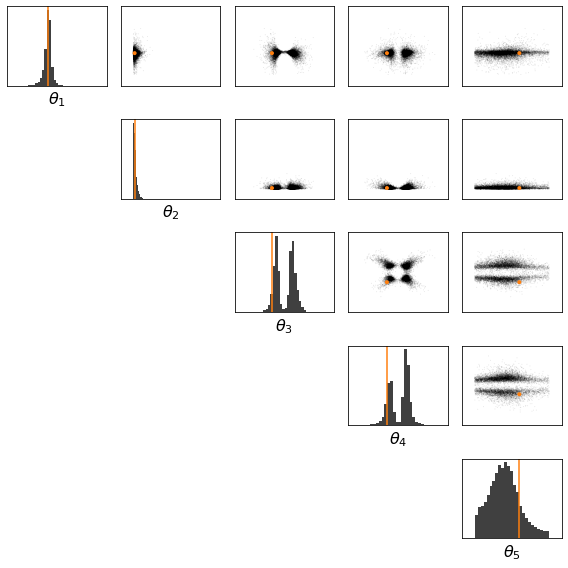

In [5]:
# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(simulator.get_ground_truth_parameters()).reshape(
        -1
    ),
)
plt.show()